In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
PATH = ("/kaggle/input/just-helping-a-friend/Image_2/Input/Dataset")
#Test_Path = ("/kaggle/input/face-recognition/test/test")
Test_path = ("/kaggle/input/just-helping-a-friend/Image_2/Input/Dataset/test")

In [3]:
DATA_PATH = os.path.join(PATH, 'train')
TEST_PATH = os.path.join(Test_path, 'New folder')
test_dir_list=os.listdir(Test_path)
data_dir_list = os.listdir(DATA_PATH)
print(data_dir_list)
print(test_dir_list)

['category 4', 'category 3', 'category 2', 'category 1']
['Test_original_6052.png_9950e35a-38c7-4388-b391-ce50bb8ea1a7.png', 'Test_original_6053.png_445dbbe1-4b09-4d56-aede-ab1695664ead.png', '1052.png', 'Test_original_C052.png_5c226e55-09ba-4fd0-bf6b-e0d2b411baa3.png', '4051.png', 'Test_original_1052.png_b95bc311-bae0-48a7-8b9f-d0eddf1ddf2b.png', 'C052.png', '6053.png', '6052.png', 'C053.png', 'Test_original_4043.png_615f9058-5c5c-4430-9f11-debd66f8a19a.png', '4052.png', 'Test_original_6053.png_62171105-bdaa-4eb5-b5e7-9b0fb7914715.png', 'Test_original_6053.png_16f2063e-9590-4ae5-b7f9-7f23c8cfa654.png', 'Test_original_1051.png_271f7fb1-f0ab-4ca7-9dae-a352fd0ed8b9.png', 'Test_original_4052.png_31cd9a66-9edc-4445-b4bc-9b0239b342e0.png', 'Test_original_4052.png_209d62b3-92ce-4e4d-8006-cf63a40088a4.png', 'Test_original_6052.png_51c87ecf-ede6-4152-960f-4d56ff913d53.png', '1051.png', 'Test_original_4043.png_fffcbc29-3aff-40c0-bdf9-2c12fa6df60b.png', '4043.png', 'Test_original_4052.png_a2ba34

In [4]:
img_rows=400
img_cols=400
num_channel=3

num_epoch = 15
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]

In [5]:
import cv2
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting images from {} folder\n".format(dataset))
    img_list = os.listdir(DATA_PATH +'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(DATA_PATH + '/' + dataset + '/' + img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting images from category 4 folder

Getting images from category 3 folder

Getting images from category 2 folder

Getting images from category 1 folder



In [6]:
num_classes = len(classes_names_list)
print(num_classes)

4


In [7]:
#normalizing it 
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255

In [8]:
#resizing the images and the num of samples
print(len(img_data))
print(img_data.shape)

440
(440, 400, 400, 3)


In [9]:
#resizing the images and the num of samples
print(len(img_data))
print(img_data.shape)

440
(440, 400, 400, 3)


In [10]:
#what is happening?
classes_names_list

['category 4', 'category 3', 'category 2', 'category 1']

In [11]:
from sklearn.preprocessing import LabelEncoder
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)

In [12]:
from collections import Counter
#Counter(classes).values()
classes = target_column
    # classes = np.ones((num_of_samples,),dtype = 'int64')
classes

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
from keras.utils import to_categorical

classes = to_categorical(classes, num_classes)

Using TensorFlow backend.


In [14]:
classes.shape

(440, 4)

In [15]:
from sklearn.utils import shuffle

X, Y = shuffle(img_data, classes, random_state=123)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

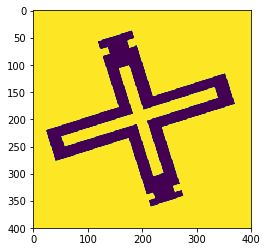

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
g = plt.imshow(X_train[3][:,:,0])

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [19]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape
print(input_shape)

(400, 400, 3)


In [20]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation = "relu", input_shape=input_shape))
model.add(Conv2D(16,(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 398, 398, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 396, 396, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 627264)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                20072480  
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)               

In [21]:
cnn_1 = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))

Train on 352 samples, validate on 88 samples
Epoch 1/15
352/352 [==============================] - 6s 18ms/step - loss: 6.0769 - accuracy: 0.6953 - val_loss: 0.4345 - val_accuracy: 0.7614
Epoch 2/15
352/352 [==============================] - 2s 5ms/step - loss: 0.3922 - accuracy: 0.8203 - val_loss: 0.3135 - val_accuracy: 0.8722
Epoch 3/15
352/352 [==============================] - 2s 5ms/step - loss: 0.7873 - accuracy: 0.7834 - val_loss: 0.3729 - val_accuracy: 0.8352
Epoch 4/15
352/352 [==============================] - 2s 5ms/step - loss: 0.3205 - accuracy: 0.8587 - val_loss: 0.3151 - val_accuracy: 0.8864
Epoch 5/15
352/352 [==============================] - 2s 5ms/step - loss: 0.1633 - accuracy: 0.9268 - val_loss: 0.2212 - val_accuracy: 0.9091
Epoch 6/15
352/352 [==============================] - 2s 5ms/step - loss: 0.0988 - accuracy: 0.9652 - val_loss: 0.2140 - val_accuracy: 0.9006
Epoch 7/15
352/352 [==============================] - 2s 5ms/step - loss: 0.0616 - accuracy: 0.9801 - 

In [22]:
import tensorflow as tf

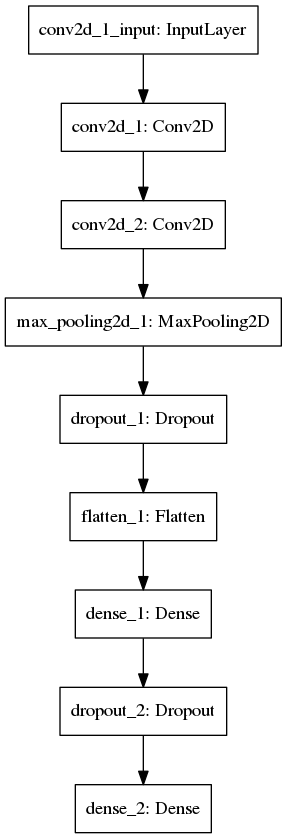

In [23]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)